In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

In [ ]:
train = pd.read_csv('train.csv')

*Step* 1: Catalog Content Size Distribution Analysis

1. CATALOG CONTENT CHARACTER LENGTH ANALYSIS
Character Length Statistics:
count    75000.000000
mean       908.886547
std        852.896151
min         32.000000
25%        251.000000
50%        643.000000
75%       1280.000000
max       7894.000000
Name: content_length, dtype: float64

Content Length Distribution:
Min length: 32
Max length: 7894
Mean length: 908.89
Median length: 643.00
Standard deviation: 852.90

Percentile Analysis:
1th percentile: 65 characters
5th percentile: 85 characters
10th percentile: 104 characters
25th percentile: 251 characters
50th percentile: 643 characters
75th percentile: 1280 characters
90th percentile: 2280 characters
95th percentile: 2593 characters
99th percentile: 3612 characters
99.5th percentile: 4052 characters
99.8th percentile: 4491 characters


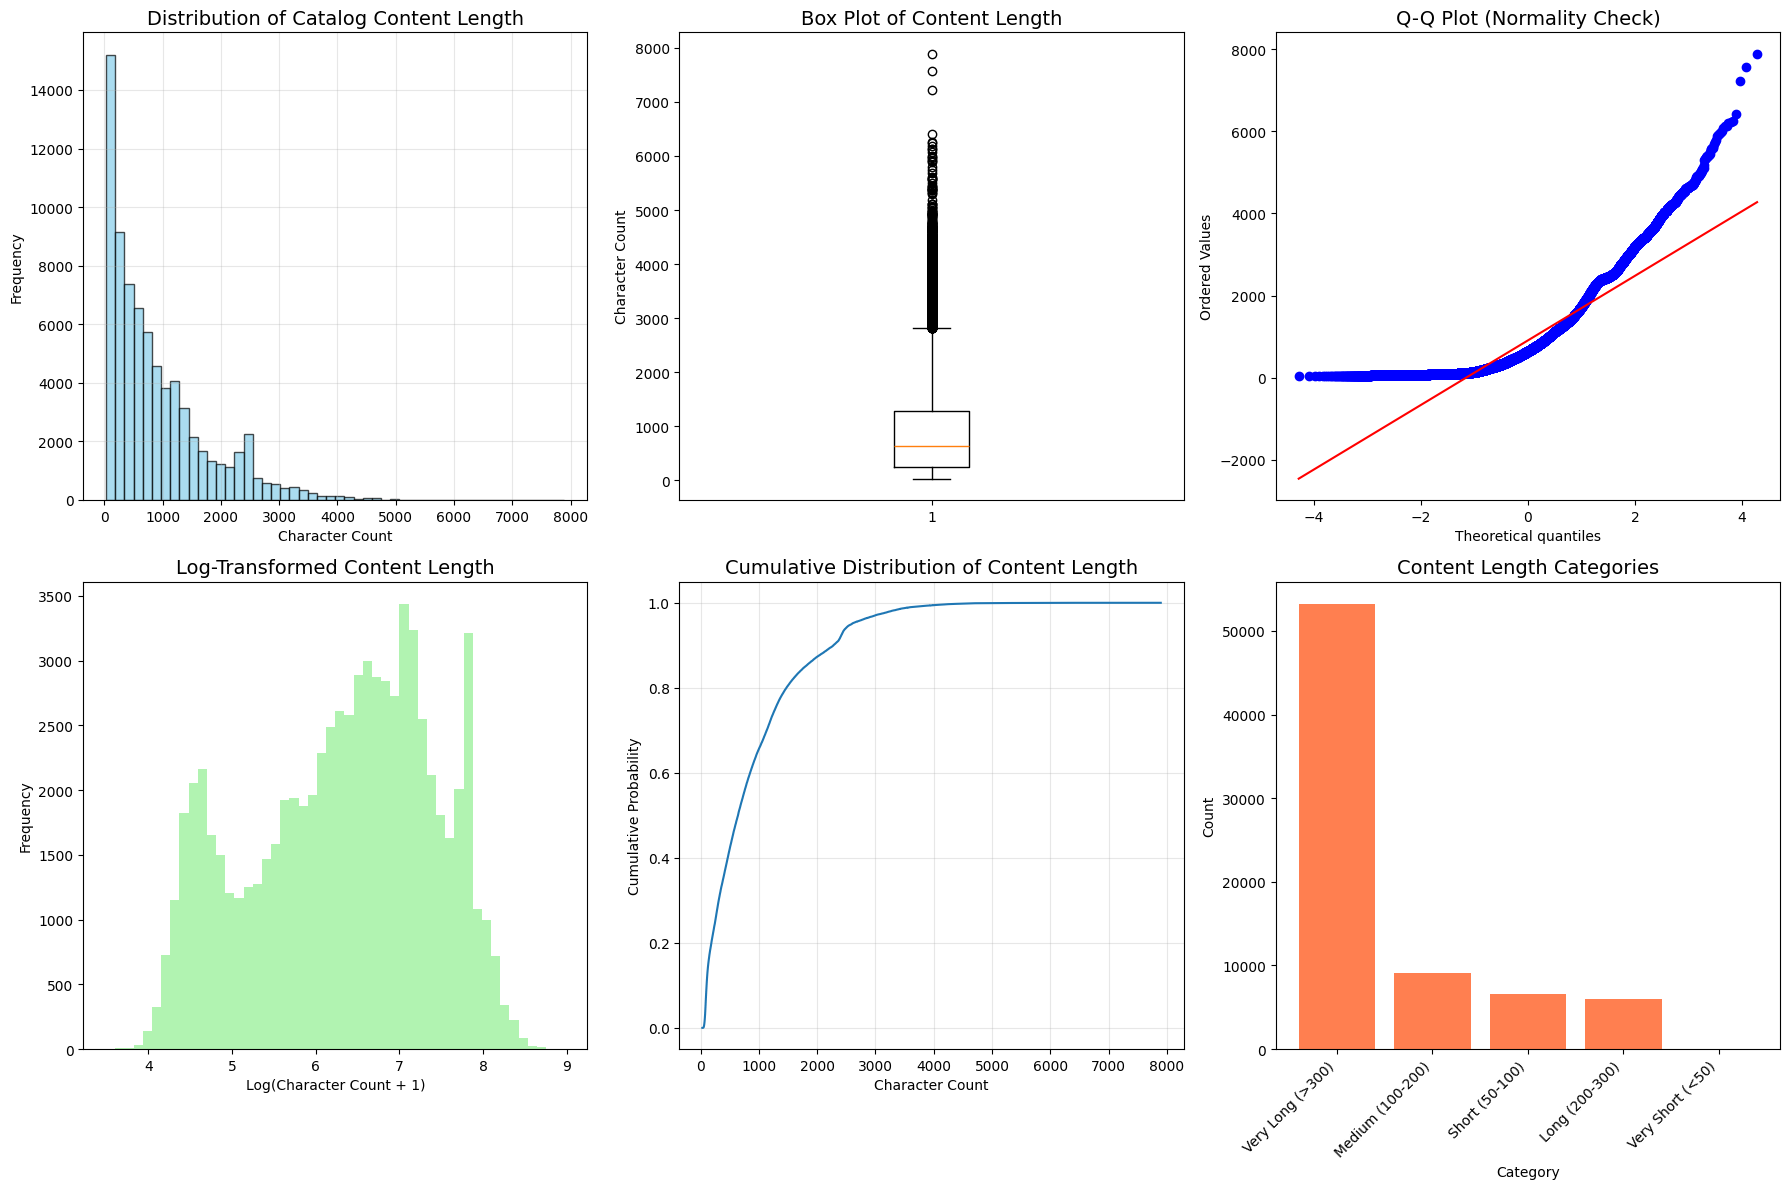


Outlier Analysis:
Lower bound: -1292 characters
Upper bound: 2824 characters
Number of outliers: 2792
Outlier percentage: 3.72%

Examples of content lengths:
Shortest content (32 chars): Item Name: -
Value: 1.0
Unit: 1

Longest content (7894 chars): Item Name: Akshit Dried Papaya Leaves, Leaf Tea, Hojas De Papaya, Natural Dried Leaf, Loose Leaves, Non GMO, No Additives, Caffeine Free. 2.6oz
Bullet Point 1: NATURAL DRIED LEAVES: Dried Papaya leave...


In [ ]:
print("=" * 60)
print("1. CATALOG CONTENT CHARACTER LENGTH ANALYSIS")
print("=" * 60)

# Calculate character lengths
train['content_length'] = train['catalog_content'].str.len()

# Basic statistics
print("Character Length Statistics:")
print(train['content_length'].describe())

# Detailed distribution analysis
print(f"\nContent Length Distribution:")
print(f"Min length: {train['content_length'].min()}")
print(f"Max length: {train['content_length'].max()}")
print(f"Mean length: {train['content_length'].mean():.2f}")
print(f"Median length: {train['content_length'].median():.2f}")
print(f"Standard deviation: {train['content_length'].std():.2f}")

# Calculate percentiles
percentiles = [1, 5, 10, 25, 50, 75, 90, 95, 99,99.5,99.8]
print(f"\nPercentile Analysis:")
for p in percentiles:
    value = train['content_length'].quantile(p/100)
    print(f"{p}th percentile: {value:.0f} characters")

# Create comprehensive visualization
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Plot 1: Histogram of content length
axes[0,0].hist(train['content_length'], bins=50, alpha=0.7, color='skyblue', edgecolor='black')
axes[0,0].set_title('Distribution of Catalog Content Length', fontsize=14)
axes[0,0].set_xlabel('Character Count')
axes[0,0].set_ylabel('Frequency')
axes[0,0].grid(True, alpha=0.3)

# Plot 2: Box plot
axes[0,1].boxplot(train['content_length'])
axes[0,1].set_title('Box Plot of Content Length', fontsize=14)
axes[0,1].set_ylabel('Character Count')

# Plot 3: Q-Q plot for normality check
stats.probplot(train['content_length'], dist="norm", plot=axes[0,2])
axes[0,2].set_title('Q-Q Plot (Normality Check)', fontsize=14)

# Plot 4: Log-transformed distribution
axes[1,0].hist(np.log1p(train['content_length']), bins=50, alpha=0.7, color='lightgreen')
axes[1,0].set_title('Log-Transformed Content Length', fontsize=14)
axes[1,0].set_xlabel('Log(Character Count + 1)')
axes[1,0].set_ylabel('Frequency')

# Plot 5: Cumulative distribution
sorted_lengths = np.sort(train['content_length'])
y = np.arange(1, len(sorted_lengths) + 1) / len(sorted_lengths)
axes[1,1].plot(sorted_lengths, y)
axes[1,1].set_title('Cumulative Distribution of Content Length', fontsize=14)
axes[1,1].set_xlabel('Character Count')
axes[1,1].set_ylabel('Cumulative Probability')
axes[1,1].grid(True, alpha=0.3)

# Plot 6: Content length categories
def categorize_length(length):
    if length < 50:
        return 'Very Short (<50)'
    elif length < 100:
        return 'Short (50-100)'
    elif length < 200:
        return 'Medium (100-200)'
    elif length < 300:
        return 'Long (200-300)'
    else:
        return 'Very Long (>300)'

train['length_category'] = train['content_length'].apply(categorize_length)
length_counts = train['length_category'].value_counts()

axes[1,2].bar(range(len(length_counts)), length_counts.values, color='coral')
axes[1,2].set_title('Content Length Categories', fontsize=14)
axes[1,2].set_xlabel('Category')
axes[1,2].set_ylabel('Count')
axes[1,2].set_xticks(range(len(length_counts)))
axes[1,2].set_xticklabels(length_counts.index, rotation=45, ha='right')

plt.tight_layout()
plt.show()

# Identify outliers using IQR method
Q1 = train['content_length'].quantile(0.25)
Q3 = train['content_length'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = train[(train['content_length'] < lower_bound) | (train['content_length'] > upper_bound)]
print(f"\nOutlier Analysis:")
print(f"Lower bound: {lower_bound:.0f} characters")
print(f"Upper bound: {upper_bound:.0f} characters")
print(f"Number of outliers: {len(outliers)}")
print(f"Outlier percentage: {len(outliers)/len(train)*100:.2f}%")

# Show examples of shortest and longest content
print(f"\nExamples of content lengths:")
shortest_idx = train['content_length'].idxmin()
longest_idx = train['content_length'].idxmax()
print(f"Shortest content ({train.loc[shortest_idx, 'content_length']} chars): {train.loc[shortest_idx, 'catalog_content']}")
print(f"Longest content ({train.loc[longest_idx, 'content_length']} chars): {train.loc[longest_idx, 'catalog_content'][:200]}...")


Step 2: Price Distribution Analysis


2. COMPREHENSIVE PRICE ANALYSIS
Price Statistics:
count    75000.000000
mean        23.647654
std         33.376932
min          0.130000
25%          6.795000
50%         14.000000
75%         28.625000
max       2796.000000
Name: price, dtype: float64

Detailed Price Analysis:
Price range: $0.13 - $2796.00
Price mean: $23.65
Price median: $14.00
Price mode: $14.99
Price standard deviation: $33.38
Coefficient of variation: 1.411
Skewness: 13.601
Kurtosis: 736.655

Price Percentiles:
1th percentile: $1.32
5th percentile: $2.44
10th percentile: $3.57
25th percentile: $6.79
50th percentile: $14.00
75th percentile: $28.62
90th percentile: $52.30
95th percentile: $75.71
99th percentile: $145.25
99.5th percentile: $183.70
99.7th percentile: $222.37


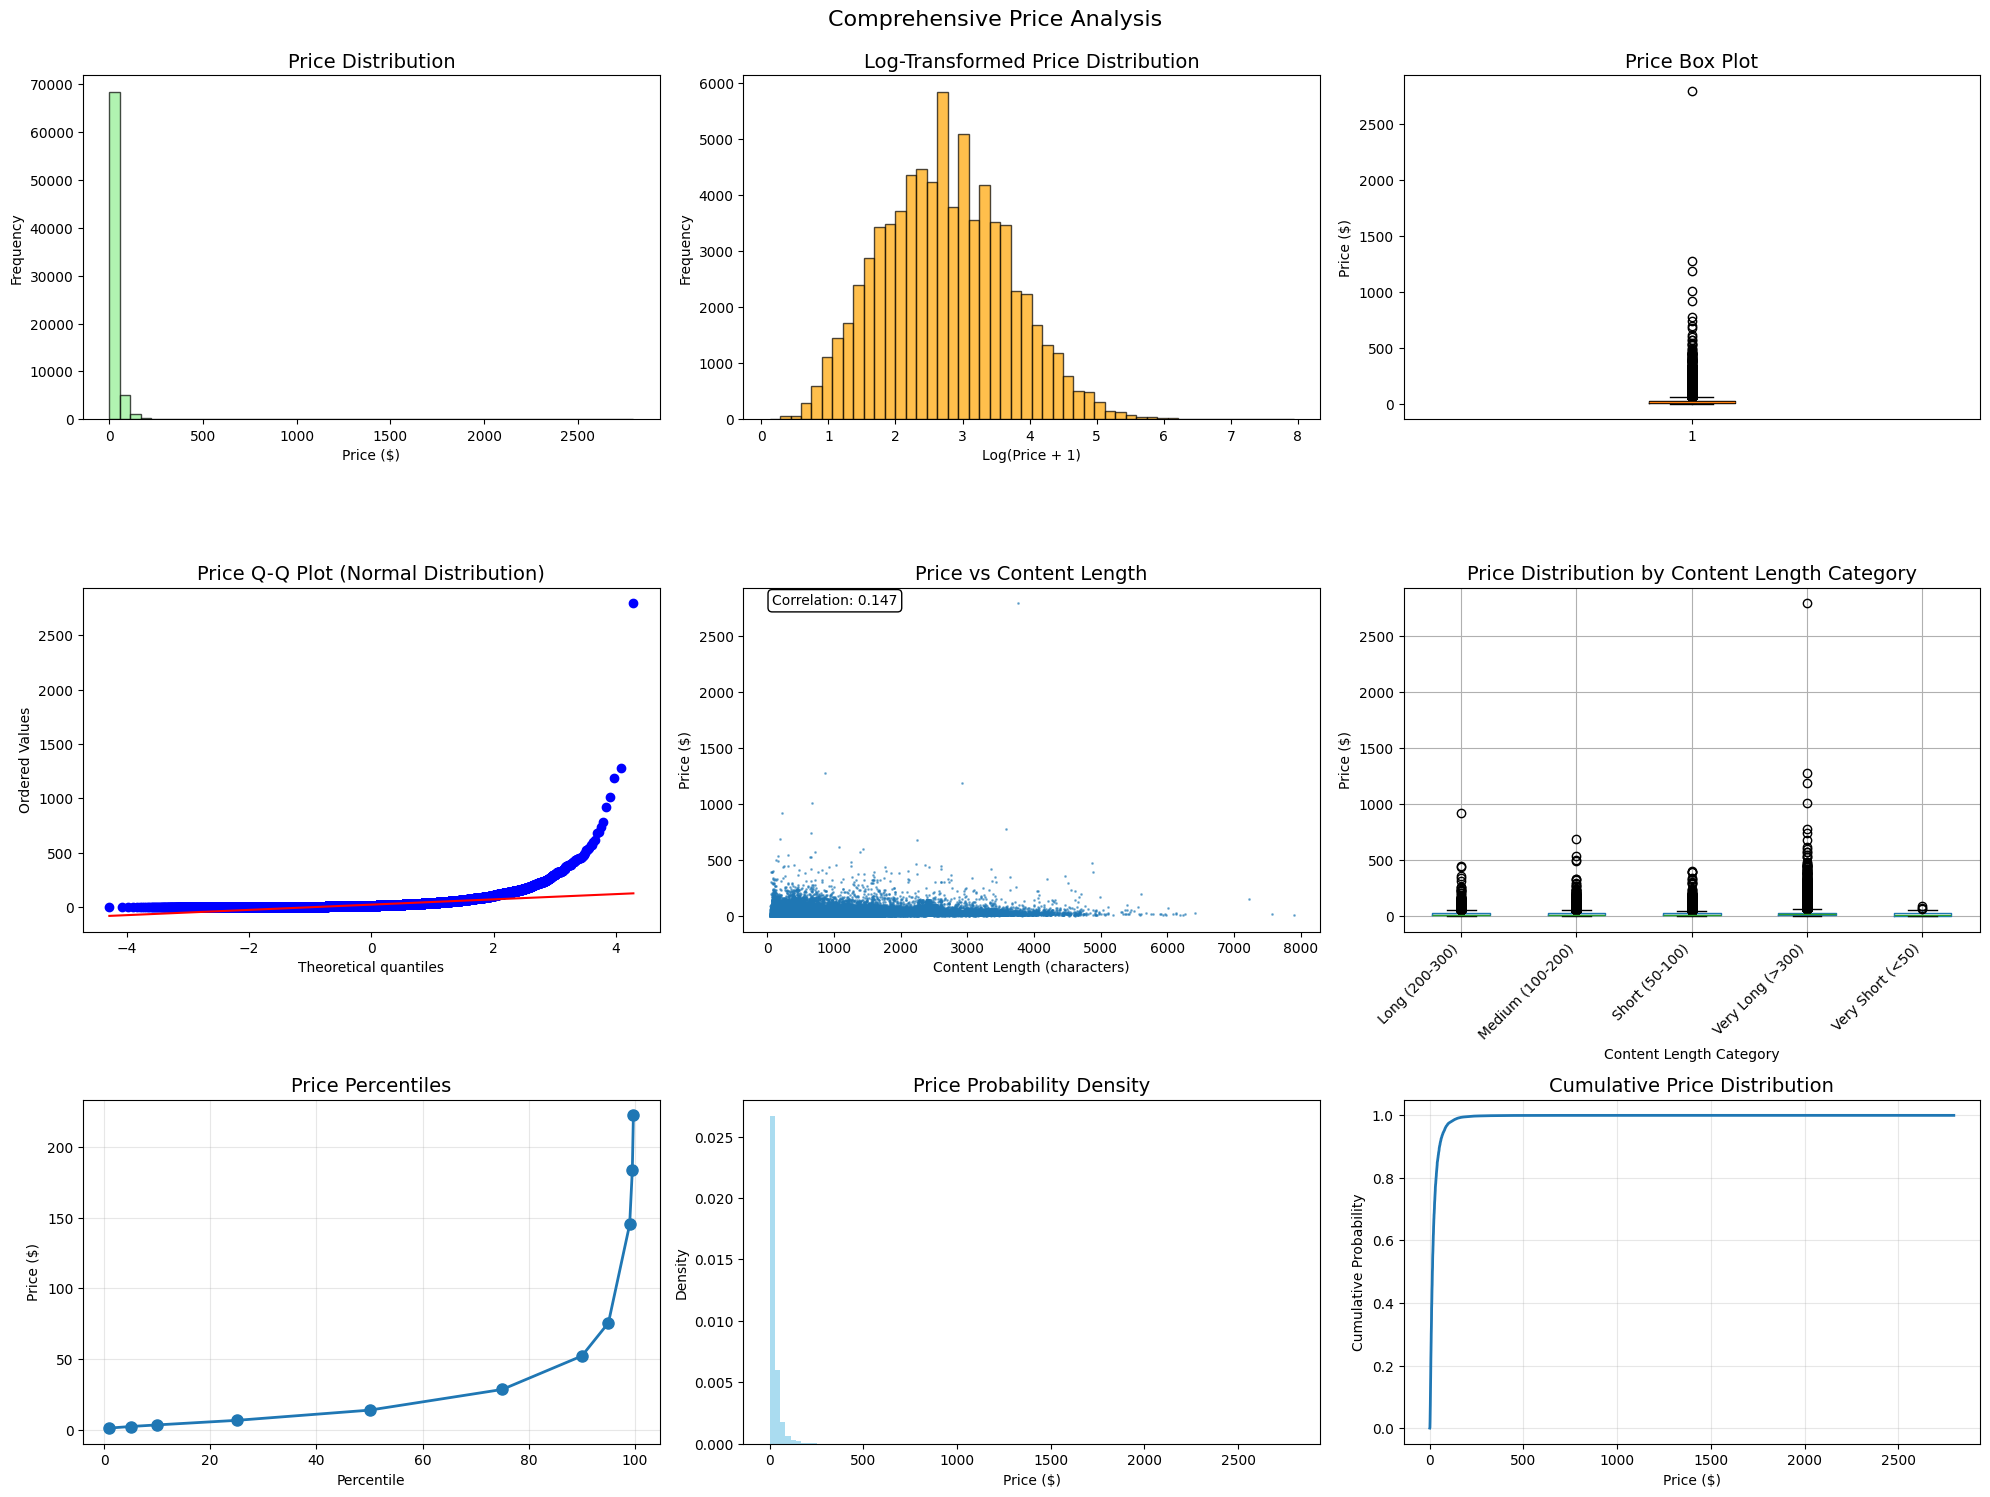


Price Outlier Analysis:
Lower bound: $-25.95
Upper bound: $61.37
Number of price outliers: 5524
Price outlier percentage: 7.37%


In [ ]:
print("\n" + "=" * 60)
print("2. COMPREHENSIVE PRICE ANALYSIS")
print("=" * 60)

# Basic price statistics
print("Price Statistics:")
print(train['price'].describe())

# Additional price metrics
print(f"\nDetailed Price Analysis:")
print(f"Price range: ${train['price'].min():.2f} - ${train['price'].max():.2f}")
print(f"Price mean: ${train['price'].mean():.2f}")
print(f"Price median: ${train['price'].median():.2f}")
print(f"Price mode: ${train['price'].mode().iloc[0]:.2f}")
print(f"Price standard deviation: ${train['price'].std():.2f}")
print(f"Coefficient of variation: {train['price'].std()/train['price'].mean():.3f}")

# Skewness and kurtosis
print(f"Skewness: {train['price'].skew():.3f}")
print(f"Kurtosis: {train['price'].kurtosis():.3f}")

# Price percentiles
price_percentiles = [1, 5, 10, 25, 50, 75, 90, 95, 99,99.5,99.7]
print(f"\nPrice Percentiles:")
for p in price_percentiles:
    value = train['price'].quantile(p/100)
    print(f"{p}th percentile: ${value:.2f}")

# Comprehensive price visualization
fig, axes = plt.subplots(3, 3, figsize=(20, 15))

# Plot 1: Price histogram
axes[0,0].hist(train['price'], bins=50, alpha=0.7, color='lightgreen', edgecolor='black')
axes[0,0].set_title('Price Distribution', fontsize=14)
axes[0,0].set_xlabel('Price ($)')
axes[0,0].set_ylabel('Frequency')

# Plot 2: Log-transformed price
axes[0,1].hist(np.log1p(train['price']), bins=50, alpha=0.7, color='orange', edgecolor='black')
axes[0,1].set_title('Log-Transformed Price Distribution', fontsize=14)
axes[0,1].set_xlabel('Log(Price + 1)')
axes[0,1].set_ylabel('Frequency')

# Plot 3: Price box plot
axes[0,2].boxplot(train['price'])
axes[0,2].set_title('Price Box Plot', fontsize=14)
axes[0,2].set_ylabel('Price ($)')

# Plot 4: Price Q-Q plot
stats.probplot(train['price'], dist="norm", plot=axes[1,0])
axes[1,0].set_title('Price Q-Q Plot (Normal Distribution)', fontsize=14)

# Plot 5: Price vs Content Length scatter
axes[1,1].scatter(train['content_length'], train['price'], alpha=0.5, s=1)
axes[1,1].set_title('Price vs Content Length', fontsize=14)
axes[1,1].set_xlabel('Content Length (characters)')
axes[1,1].set_ylabel('Price ($)')

# Calculate correlation
correlation = train['content_length'].corr(train['price'])
axes[1,1].text(0.05, 0.95, f'Correlation: {correlation:.3f}',
               transform=axes[1,1].transAxes, bbox=dict(boxstyle="round", facecolor='white'))

# Plot 6: Price by length category
train.boxplot(column='price', by='length_category', ax=axes[1,2])
axes[1,2].set_title('Price Distribution by Content Length Category', fontsize=14)
axes[1,2].set_xlabel('Content Length Category')
axes[1,2].set_ylabel('Price ($)')
plt.setp(axes[1,2].get_xticklabels(), rotation=45, ha='right')

# Plot 7: Price percentile plot
percentiles_values = [train['price'].quantile(p/100) for p in price_percentiles]
axes[2,0].plot(price_percentiles, percentiles_values, marker='o', linewidth=2, markersize=8)
axes[2,0].set_title('Price Percentiles', fontsize=14)
axes[2,0].set_xlabel('Percentile')
axes[2,0].set_ylabel('Price ($)')
axes[2,0].grid(True, alpha=0.3)

# Plot 8: Price density plot
axes[2,1].hist(train['price'], bins=100, density=True, alpha=0.7, color='skyblue')
axes[2,1].set_title('Price Probability Density', fontsize=14)
axes[2,1].set_xlabel('Price ($)')
axes[2,1].set_ylabel('Density')

# Plot 9: Cumulative price distribution
sorted_prices = np.sort(train['price'])
y_prices = np.arange(1, len(sorted_prices) + 1) / len(sorted_prices)
axes[2,2].plot(sorted_prices, y_prices, linewidth=2)
axes[2,2].set_title('Cumulative Price Distribution', fontsize=14)
axes[2,2].set_xlabel('Price ($)')
axes[2,2].set_ylabel('Cumulative Probability')
axes[2,2].grid(True, alpha=0.3)

plt.suptitle('Comprehensive Price Analysis', fontsize=16, y=0.995)
plt.tight_layout()
plt.show()

# Price outlier analysis
price_Q1 = train['price'].quantile(0.25)
price_Q3 = train['price'].quantile(0.75)
price_IQR = price_Q3 - price_Q1
price_lower = price_Q1 - 1.5 * price_IQR
price_upper = price_Q3 + 1.5 * price_IQR

price_outliers = train[(train['price'] < price_lower) | (train['price'] > price_upper)]
print(f"\nPrice Outlier Analysis:")
print(f"Lower bound: ${price_lower:.2f}")
print(f"Upper bound: ${price_upper:.2f}")
print(f"Number of price outliers: {len(price_outliers)}")
print(f"Price outlier percentage: {len(price_outliers)/len(train)*100:.2f}%")


Step 3: Duplicate Analysis - All Three Scenarios


3. COMPREHENSIVE DUPLICATE ANALYSIS
Initial Duplicate Detection:
Total rows: 75000
Unique catalog_content: 74900
Unique image_links: 72288
Unique prices: 11862

Duplicate Summary:
Rows with duplicate content: 193 (0.3%)
Rows with duplicate images: 4887 (6.5%)
Rows with exact duplicates: 92 (0.1%)

SCENARIO A: Same Content, Different Images
Number of content groups with different images: 48
Average entries per group: 2.1
Average price range: $12.84
Average price standard deviation: $8.87
Groups with same price for all entries: 13

Top 5 examples:
                                             content  num_entries  \
0  Item Name: 100% Organic Tahini\nValue: 144.0\n...            2   
1  Item Name: 12 Pack: FolkArt® Glossy™ High-Glos...            2   
2  Item Name: Amos Gummi Teeth Candy Vampire Teet...            2   
3  Item Name: BARNEY BUTTER NUT BTTR ALMND CRNCHY...            2   
4  Item Name: BHUJA Nut Mix, 7-Ounce Bags (Pack o...            2   

   unique_images  min_price  max

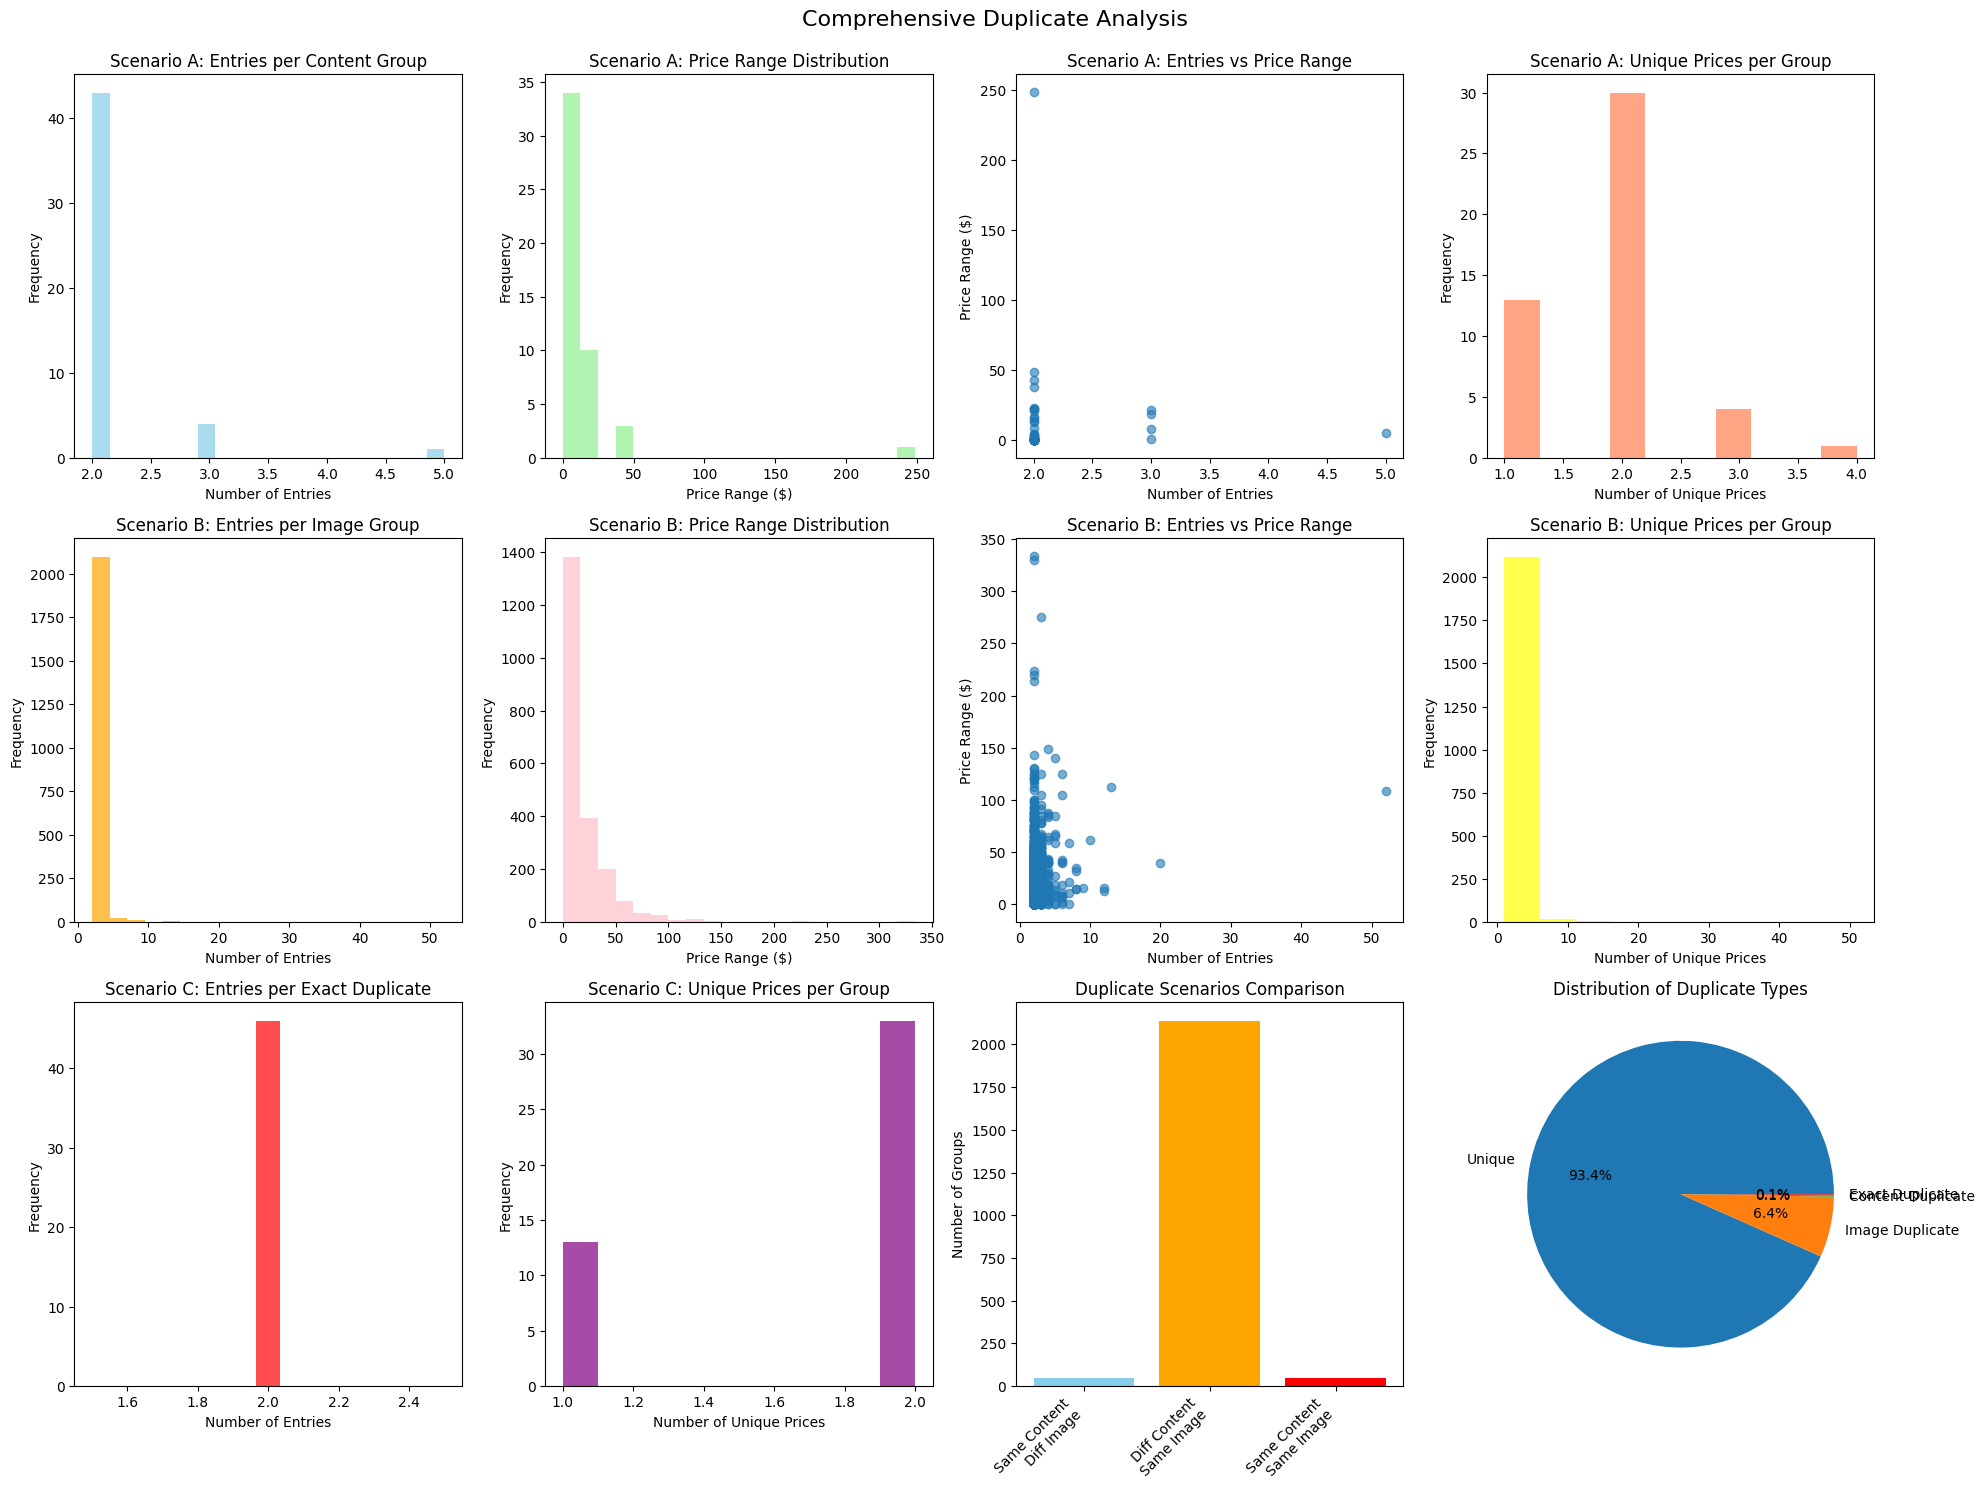

In [ ]:
print("\n" + "=" * 60)
print("3. COMPREHENSIVE DUPLICATE ANALYSIS")
print("=" * 60)

# Initial duplicate detection
print("Initial Duplicate Detection:")
print(f"Total rows: {len(train)}")
print(f"Unique catalog_content: {train['catalog_content'].nunique()}")
print(f"Unique image_links: {train['image_link'].nunique()}")
print(f"Unique prices: {train['price'].nunique()}")

# Mark different types of duplicates
train['is_content_dup'] = train.duplicated(['catalog_content'], keep=False)
train['is_image_dup'] = train.duplicated(['image_link'], keep=False)
train['is_exact_dup'] = train.duplicated(['catalog_content', 'image_link'], keep=False)

content_dup_count = train['is_content_dup'].sum()
image_dup_count = train['is_image_dup'].sum()
exact_dup_count = train['is_exact_dup'].sum()

print(f"\nDuplicate Summary:")
print(f"Rows with duplicate content: {content_dup_count} ({content_dup_count/len(train)*100:.1f}%)")
print(f"Rows with duplicate images: {image_dup_count} ({image_dup_count/len(train)*100:.1f}%)")
print(f"Rows with exact duplicates: {exact_dup_count} ({exact_dup_count/len(train)*100:.1f}%)")

# SCENARIO A: Same catalog_content, Different image
print("\n" + "="*50)
print("SCENARIO A: Same Content, Different Images")
print("="*50)

scenario_a_analysis = []
content_groups = train.groupby('catalog_content')

for content, group in content_groups:
    if len(group) > 1:  # Multiple rows with same content
        unique_images = group['image_link'].nunique()
        if unique_images > 1:  # Different images
            price_stats = {
                'content': content[:50] + "..." if len(content) > 50 else content,
                'num_entries': len(group),
                'unique_images': unique_images,
                'min_price': group['price'].min(),
                'max_price': group['price'].max(),
                'mean_price': group['price'].mean(),
                'price_std': group['price'].std(),
                'price_range': group['price'].max() - group['price'].min(),
                'unique_prices': group['price'].nunique()
            }
            scenario_a_analysis.append(price_stats)

scenario_a_df = pd.DataFrame(scenario_a_analysis)
print(f"Number of content groups with different images: {len(scenario_a_df)}")

if len(scenario_a_df) > 0:
    print(f"Average entries per group: {scenario_a_df['num_entries'].mean():.1f}")
    print(f"Average price range: ${scenario_a_df['price_range'].mean():.2f}")
    print(f"Average price standard deviation: ${scenario_a_df['price_std'].mean():.2f}")
    print(f"Groups with same price for all entries: {(scenario_a_df['price_range'] == 0).sum()}")

    # Show examples
    print("\nTop 5 examples:")
    display_cols = ['content', 'num_entries', 'unique_images', 'min_price', 'max_price', 'price_range']
    print(scenario_a_df[display_cols].head())

# SCENARIO B: Different catalog_content, Same image
print("\n" + "="*50)
print("SCENARIO B: Different Content, Same Images")
print("="*50)

scenario_b_analysis = []
image_groups = train.groupby('image_link')

for image, group in image_groups:
    if len(group) > 1:  # Multiple rows with same image
        unique_contents = group['catalog_content'].nunique()
        if unique_contents > 1:  # Different contents
            price_stats = {
                'image_link': image,
                'num_entries': len(group),
                'unique_contents': unique_contents,
                'min_price': group['price'].min(),
                'max_price': group['price'].max(),
                'mean_price': group['price'].mean(),
                'price_std': group['price'].std(),
                'price_range': group['price'].max() - group['price'].min(),
                'unique_prices': group['price'].nunique()
            }
            scenario_b_analysis.append(price_stats)

scenario_b_df = pd.DataFrame(scenario_b_analysis)
print(f"Number of image groups with different content: {len(scenario_b_df)}")

if len(scenario_b_df) > 0:
    print(f"Average entries per group: {scenario_b_df['num_entries'].mean():.1f}")
    print(f"Average price range: ${scenario_b_df['price_range'].mean():.2f}")
    print(f"Average price standard deviation: ${scenario_b_df['price_std'].mean():.2f}")
    print(f"Groups with same price for all entries: {(scenario_b_df['price_range'] == 0).sum()}")

# SCENARIO C: Same catalog_content, Same image (Exact duplicates)
print("\n" + "="*50)
print("SCENARIO C: Same Content, Same Images (Exact Duplicates)")
print("="*50)

scenario_c_analysis = []
exact_groups = train.groupby(['catalog_content', 'image_link']).size().reset_index(name='count')
exact_duplicates_groups = exact_groups[exact_groups['count'] > 1]

for _, row in exact_duplicates_groups.iterrows():
    content = row['catalog_content']
    image = row['image_link']
    group = train[(train['catalog_content'] == content) & (train['image_link'] == image)]

    price_stats = {
        'content': content[:50] + "..." if len(content) > 50 else content,
        'image_link': image,
        'num_entries': len(group),
        'min_price': group['price'].min(),
        'max_price': group['price'].max(),
        'mean_price': group['price'].mean(),
        'price_std': group['price'].std(),
        'price_range': group['price'].max() - group['price'].min(),
        'unique_prices': group['price'].nunique()
    }
    scenario_c_analysis.append(price_stats)

scenario_c_df = pd.DataFrame(scenario_c_analysis)
print(f"Number of exact duplicate groups: {len(scenario_c_df)}")

if len(scenario_c_df) > 0:
    print(f"Average entries per group: {scenario_c_df['num_entries'].mean():.1f}")
    print(f"Average price range: ${scenario_c_df['price_range'].mean():.2f}")
    print(f"Groups with identical prices: {(scenario_c_df['price_range'] == 0).sum()}")
    print(f"Groups with different prices: {(scenario_c_df['price_range'] > 0).sum()}")

    # Show examples
    print("\nTop 5 examples:")
    display_cols = ['content', 'num_entries', 'min_price', 'max_price', 'price_range', 'unique_prices']
    print(scenario_c_df[display_cols].head())

# COMPREHENSIVE DUPLICATE VISUALIZATION
fig, axes = plt.subplots(3, 4, figsize=(20, 15))

# Row 1: Scenario A visualizations
if len(scenario_a_df) > 0:
    axes[0,0].hist(scenario_a_df['num_entries'], bins=20, alpha=0.7, color='skyblue')
    axes[0,0].set_title('Scenario A: Entries per Content Group')
    axes[0,0].set_xlabel('Number of Entries')
    axes[0,0].set_ylabel('Frequency')

    axes[0,1].hist(scenario_a_df['price_range'], bins=20, alpha=0.7, color='lightgreen')
    axes[0,1].set_title('Scenario A: Price Range Distribution')
    axes[0,1].set_xlabel('Price Range ($)')
    axes[0,1].set_ylabel('Frequency')

    axes[0,2].scatter(scenario_a_df['num_entries'], scenario_a_df['price_range'], alpha=0.6)
    axes[0,2].set_title('Scenario A: Entries vs Price Range')
    axes[0,2].set_xlabel('Number of Entries')
    axes[0,2].set_ylabel('Price Range ($)')

    axes[0,3].hist(scenario_a_df['unique_prices'], bins=10, alpha=0.7, color='coral')
    axes[0,3].set_title('Scenario A: Unique Prices per Group')
    axes[0,3].set_xlabel('Number of Unique Prices')
    axes[0,3].set_ylabel('Frequency')

# Row 2: Scenario B visualizations
if len(scenario_b_df) > 0:
    axes[1,0].hist(scenario_b_df['num_entries'], bins=20, alpha=0.7, color='orange')
    axes[1,0].set_title('Scenario B: Entries per Image Group')
    axes[1,0].set_xlabel('Number of Entries')
    axes[1,0].set_ylabel('Frequency')

    axes[1,1].hist(scenario_b_df['price_range'], bins=20, alpha=0.7, color='pink')
    axes[1,1].set_title('Scenario B: Price Range Distribution')
    axes[1,1].set_xlabel('Price Range ($)')
    axes[1,1].set_ylabel('Frequency')

    axes[1,2].scatter(scenario_b_df['num_entries'], scenario_b_df['price_range'], alpha=0.6)
    axes[1,2].set_title('Scenario B: Entries vs Price Range')
    axes[1,2].set_xlabel('Number of Entries')
    axes[1,2].set_ylabel('Price Range ($)')

    axes[1,3].hist(scenario_b_df['unique_prices'], bins=10, alpha=0.7, color='yellow')
    axes[1,3].set_title('Scenario B: Unique Prices per Group')
    axes[1,3].set_xlabel('Number of Unique Prices')
    axes[1,3].set_ylabel('Frequency')

# Row 3: Scenario C and summary visualizations
if len(scenario_c_df) > 0:
    axes[2,0].hist(scenario_c_df['num_entries'], bins=15, alpha=0.7, color='red')
    axes[2,0].set_title('Scenario C: Entries per Exact Duplicate')
    axes[2,0].set_xlabel('Number of Entries')
    axes[2,0].set_ylabel('Frequency')

    axes[2,1].hist(scenario_c_df['unique_prices'], bins=10, alpha=0.7, color='purple')
    axes[2,1].set_title('Scenario C: Unique Prices per Group')
    axes[2,1].set_xlabel('Number of Unique Prices')
    axes[2,1].set_ylabel('Frequency')

# Summary comparison
duplicate_counts = [
    len(scenario_a_df) if len(scenario_a_df) > 0 else 0,
    len(scenario_b_df) if len(scenario_b_df) > 0 else 0,
    len(scenario_c_df) if len(scenario_c_df) > 0 else 0
]
scenario_labels = ['Same Content\nDiff Image', 'Diff Content\nSame Image', 'Same Content\nSame Image']
axes[2,2].bar(scenario_labels, duplicate_counts, color=['skyblue', 'orange', 'red'])
axes[2,2].set_title('Duplicate Scenarios Comparison')
axes[2,2].set_ylabel('Number of Groups')
plt.setp(axes[2,2].get_xticklabels(), rotation=45, ha='right')

# Price distribution by duplicate type
duplicate_types = []
for _, row in train.iterrows():
    if row['is_exact_dup']:
        duplicate_types.append('Exact Duplicate')
    elif row['is_content_dup']:
        duplicate_types.append('Content Duplicate')
    elif row['is_image_dup']:
        duplicate_types.append('Image Duplicate')
    else:
        duplicate_types.append('Unique')

train['duplicate_type'] = duplicate_types
dup_type_counts = train['duplicate_type'].value_counts()
axes[2,3].pie(dup_type_counts.values, labels=dup_type_counts.index, autopct='%1.1f%%')
axes[2,3].set_title('Distribution of Duplicate Types')

plt.suptitle('Comprehensive Duplicate Analysis', fontsize=16, y=0.995)
plt.tight_layout()
plt.show()


Step 4: Methods to Handle Duplicates During Training


4. METHODS TO HANDLE DUPLICATES DURING TRAINING

Applying all duplicate handling methods:
Original dataset size: 75000 rows
Method 1: Remove All Duplicates
After removing exact duplicates: 74954 rows (removed 46)
After removing content duplicates: 74900 rows
Final dataset size: 72236 rows
Total reduction: 3.7%

Method 2: Keep One Representative per Duplicate Group
After keeping representatives: 74954 rows
Reduction: 0.1%

Method 3: Average Prices for Duplicate Groups
After averaging duplicate prices: 74954 rows
Reduction: 0.1%

Method 4: Weighted Sampling (keeping 95.0% of data)
Sampled dataset size: 71250 rows
Reduction: 5.0%

Method 5: Strategic Handling by Scenario
Scenario A (Same content, diff images): Keep all samples
Scenario B (Diff content, same images): Keep all samples
Scenario C (Exact duplicates): Removed 46 duplicate rows
Final dataset size: 74954 rows
Total reduction: 0.1%

Method 6: Parametric Strategic Handling by Scenario
Scenario C (Exact duplicates): Averaging pric

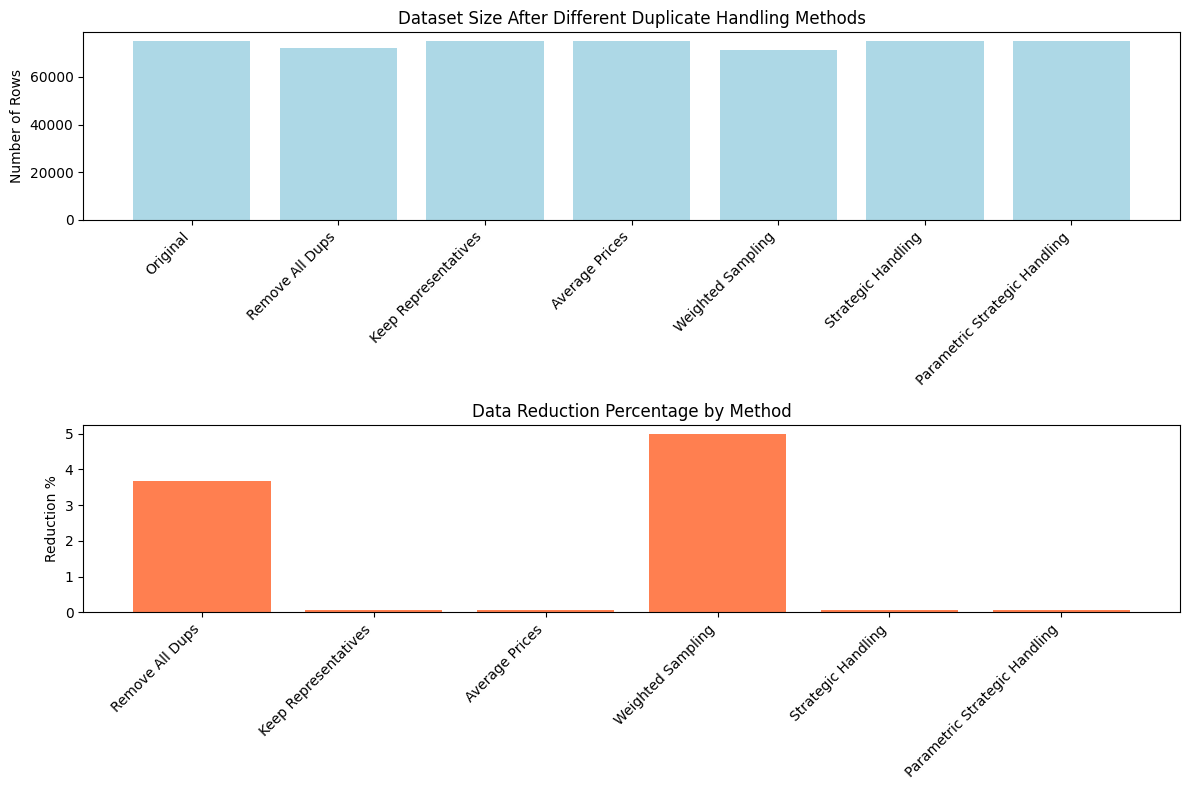

In [ ]:
print("\n" + "=" * 60)
print("4. METHODS TO HANDLE DUPLICATES DURING TRAINING")
print("=" * 60)

# Method 1: Complete Duplicate Removal
def method1_remove_all_duplicates(df):
    """Remove all types of duplicates"""
    print("Method 1: Remove All Duplicates")

    # Remove exact duplicates first
    df_clean = df.drop_duplicates(['catalog_content', 'image_link'])
    print(f"After removing exact duplicates: {len(df_clean)} rows (removed {len(df) - len(df_clean)})")

    # Remove content duplicates
    df_clean = df_clean.drop_duplicates(['catalog_content'])
    print(f"After removing content duplicates: {len(df_clean)} rows")

    # Remove image duplicates
    df_clean = df_clean.drop_duplicates(['image_link'])
    print(f"Final dataset size: {len(df_clean)} rows")
    print(f"Total reduction: {(1 - len(df_clean)/len(df))*100:.1f}%")

    return df_clean

# Method 2: Keep one representative per duplicate group
def method2_keep_representative(df):
    """Keep one representative sample per duplicate group"""
    print("\nMethod 2: Keep One Representative per Duplicate Group")

    # For exact duplicates, keep the one with median price
    exact_dup_groups = df.groupby(['catalog_content', 'image_link'])
    representatives = []

    for (content, image), group in exact_dup_groups:
        if len(group) > 1:
            # Keep the sample with price closest to median
            median_price = group['price'].median()
            closest_idx = (group['price'] - median_price).abs().idxmin()
            representatives.append(group.loc[closest_idx])
        else:
            representatives.append(group.iloc)

    df_clean = pd.DataFrame(representatives)
    print(f"After keeping representatives: {len(df_clean)} rows")
    print(f"Reduction: {(1 - len(df_clean)/len(df))*100:.1f}%")

    return df_clean

# Method 3: Average prices for duplicate groups
def method3_average_prices(df):
    """Average prices for duplicate groups"""
    print("\nMethod 3: Average Prices for Duplicate Groups")

    # Group by content and image, average the prices
    averaged_df = df.groupby(['catalog_content', 'image_link']).agg({
        'sample_id': 'first',  # Keep first sample_id
        'price': 'mean'  # Average the price
    }).reset_index()

    print(f"After averaging duplicate prices: {len(averaged_df)} rows")
    print(f"Reduction: {(1 - len(averaged_df)/len(df))*100:.1f}%")

    return averaged_df

# Method 4: Weighted sampling based on frequency
def method4_weighted_sampling(df, sample_fraction=0.95): # sample_fraction is a Hyper-Parameter
    """Use weighted sampling to reduce duplicates while preserving distribution"""
    print(f"\nMethod 4: Weighted Sampling (keeping {sample_fraction*100}% of data)")

    # Calculate weights inversely proportional to duplicate frequency
    duplicate_counts = df.groupby(['catalog_content', 'image_link']).size()
    df['duplicate_count'] = df.apply(lambda x: duplicate_counts[(x['catalog_content'], x['image_link'])], axis=1)
    df['sample_weight'] = 1.0 / df['duplicate_count']

    # Normalize weights
    df['sample_weight'] = df['sample_weight'] / df['sample_weight'].sum()

    # Sample based on weights
    n_samples = int(len(df) * sample_fraction)
    sampled_indices = np.random.choice(df.index, size=n_samples,
                                     replace=False, p=df['sample_weight'])
    df_sampled = df.loc[sampled_indices].drop(['duplicate_count', 'sample_weight'], axis=1)

    print(f"Sampled dataset size: {len(df_sampled)} rows")
    print(f"Reduction: {(1 - len(df_sampled)/len(df))*100:.1f}%")

    return df_sampled

# Method 5: Strategic duplicate handling by scenario
def method5_strategic_handling(df):
    """Handle different duplicate scenarios with different strategies"""
    print("\nMethod 5: Strategic Handling by Scenario")

    df_result = df.copy()

    # Scenario A: Same content, different images - keep all (might be different products)
    print("Scenario A (Same content, diff images): Keep all samples")

    # Scenario B: Different content, same images - keep all (different descriptions of same product)
    print("Scenario B (Diff content, same images): Keep all samples")

    # Scenario C: Exact duplicates - remove or average
    exact_duplicates = df_result.duplicated(['catalog_content', 'image_link'], keep=False)
    exact_dup_groups = df_result[exact_duplicates].groupby(['catalog_content', 'image_link'])

    indices_to_remove = []
    for (content, image), group in exact_dup_groups:
        if len(group) > 1:
            # Keep the first one, remove others
            indices_to_remove.extend(group.index[1:].tolist())

    df_result = df_result.drop(indices_to_remove)
    print(f"Scenario C (Exact duplicates): Removed {len(indices_to_remove)} duplicate rows")
    print(f"Final dataset size: {len(df_result)} rows")
    print(f"Total reduction: {(1 - len(df_result)/len(df))*100:.1f}%")

    return df_result

# # Method 6: Parametric Strategic duplicate handling by scenario
# def method6_parametric_strategic_handling(df, b=0.5):  # b is a Hyper-Parameter
#     """
#     Method 6: Parametric Strategic Handling by Scenario

#     Scenario A: Same content, different images → Keep all
#     Scenario B: Different content, same images →
#                 If price mode frequency ≥ b * group_size → assign mode price
#                 Else → assign average price
#     Scenario C: Exact duplicates (same content & image) → Take mean of prices
#     """
#     print("\nMethod 6: Parametric Strategic Handling by Scenario")
#     df_result = df.copy()

#     # Scenario C (First Consider Scenario C): Exact duplicates (same content + same image)
#     print("Scenario C (Exact duplicates): Take mean of prices")

#     # Group by exact duplicates and take mean of prices
#     df_result = (
#         df_result
#         .groupby(['catalog_content', 'image_link'], as_index=False)
#         .agg({
#             'sample_id': 'first',   # keep first sample_id
#             'price': 'mean'         # average all duplicate prices
#         })
#     )

#     # Scenario A: Same content, different images — Keep all
#     print("Scenario A (Same content, diff images): Keep all samples")


#     # Scenario B: Different content, same images
#     print(f"Scenario B (Diff content, same images): Mode vs Avg based on threshold b={b}")

#     image_groups = df_result.groupby('image_link')
#     updated_rows = []

#     for image, group in image_groups:
#         # Skip single-item groups
#         if len(group) == 1:
#             updated_rows.append(group)
#             continue

#         price_counts = group['price'].value_counts(normalize=True)
#         top_price = price_counts.index[0]
#         top_freq = price_counts.iloc[0]

#         if top_freq >= b:
#             # Mode dominates → use mode price
#             chosen_price = top_price
#         else:
#             # Otherwise → use average price
#             chosen_price = group['price'].mean()

#         group['price'] = chosen_price
#         updated_rows.append(group)

#     df_result = pd.concat(updated_rows, axis=0)


#     # Summary
#     print(f"Final dataset size: {len(df_result)} rows")
#     print(f"Total reduction: {(1 - len(df_result) / len(df)) * 100:.1f}%")

#     return df_result
# # Method 6: Parametric Strategic duplicate handling by scenario
def method6_parametric_strategic_handling(df, b=0.5):   # b is a Hyper-Parameter
    """
    Method 6: Parametric Strategic Handling by Scenario

    Scenario A: Same content, different images → Keep all
    Scenario B: Different content, same images →
                If price mode frequency ≥ b * group_size → assign mode price
                Else → assign average price
    Scenario C: Exact duplicates (same content & image) → Take mean of prices and keep only one representative
    """
    print("\nMethod 6: Parametric Strategic Handling by Scenario")
    df_result = df.copy()

    # Scenario C: Exact duplicates (same content + same image)
    print("Scenario C (Exact duplicates): Averaging prices & keeping one representative row")

    # Group by exact duplicates
    grouped = df_result.groupby(['catalog_content', 'image_link'])
    reduced_rows = []
    excluded_ids = set()  # store IDs of removed duplicates

    for (content, img), group in grouped:
        if len(group) > 1:
            # Compute mean price
            avg_price = group['price'].mean()
            # Keep the first record as representative
            rep = group.iloc[0].copy()
            rep['price'] = avg_price
            reduced_rows.append(rep)

            # Log removed sample_ids
            excluded_ids.update(group['sample_id'].tolist()[:])  # all except first
        else:
            reduced_rows.append(group.iloc[0])

    df_result = pd.DataFrame(reduced_rows)

    # Scenario A: Same content, different images — Keep all
    # (already naturally handled)
    print("Scenario A (Same content, diff images): Keep all samples")

    # Scenario B: Different content, same images
    print(f"Scenario B (Diff content, same images): Mode vs Avg based on threshold b={b}")
    print(f"Excluded {len(excluded_ids)} sample_ids from Scenario B consideration")

    image_groups = df_result.groupby('image_link')
    updated_rows = []

    for image, group in image_groups:
        # Skip if this group only has 1 row
        if len(group) == 1:
            updated_rows.append(group)
            continue

        # Exclude any row involved in Scenario C
        group = group[~group['sample_id'].isin(excluded_ids)].copy()
        if group.empty:
            continue

        # Calculate price frequency
        price_counts = group['price'].value_counts(normalize=True)
        top_price = price_counts.index[0]
        top_freq = price_counts.iloc[0]

        if top_freq >= b:
            chosen_price = top_price
        else:
            chosen_price = group['price'].mean()

        group['price'] = chosen_price
        updated_rows.append(group)

    # Merge updated groups
    if updated_rows:
        df_result = pd.concat(updated_rows, axis=0).reset_index(drop=True)

    # Summary
    print(f"Final dataset size: {len(df_result)} rows")
    print(f"Total reduction: {(1 - len(df_result) / len(df)) * 100:.1f}%")
    print(f"Scenario C excluded {len(excluded_ids)} duplicate sample_ids")

    return df_result


# Apply all methods and compare
print("\nApplying all duplicate handling methods:")
print(f"Original dataset size: {len(train)} rows")

# Apply methods
df_method1 = method1_remove_all_duplicates(train.copy())
df_method2 = method2_keep_representative(train.copy())
df_method3 = method3_average_prices(train.copy())
df_method4 = method4_weighted_sampling(train.copy())
df_method5 = method5_strategic_handling(train.copy())
df_method6 = method6_parametric_strategic_handling(train.copy())

# Summary comparison
methods_comparison = {
    'Method': ['Original', 'Remove All Dups', 'Keep Representatives',
               'Average Prices', 'Weighted Sampling', 'Strategic Handling', 'Parametric Strategic Handling'],
    'Dataset Size': [len(train), len(df_method1), len(df_method2),
                     len(df_method3), len(df_method4), len(df_method5), len(df_method6)],
    'Reduction %': [0,
                    (1-len(df_method1)/len(train))*100,
                    (1-len(df_method2)/len(train))*100,
                    (1-len(df_method3)/len(train))*100,
                    (1-len(df_method4)/len(train))*100,
                    (1-len(df_method5)/len(train))*100,
                    (1-len(df_method6)/len(train))*100,]
}

comparison_df = pd.DataFrame(methods_comparison)
print("\n" + "="*60)
print("METHODS COMPARISON SUMMARY")
print("="*60)
print(comparison_df)

# Visualization of methods comparison
plt.figure(figsize=(12, 8))

plt.subplot(2, 1, 1)
plt.bar(comparison_df['Method'], comparison_df['Dataset Size'], color='lightblue')
plt.title('Dataset Size After Different Duplicate Handling Methods')
plt.ylabel('Number of Rows')
plt.xticks(rotation=45, ha='right')

plt.subplot(2, 1, 2)
plt.bar(comparison_df['Method'][1:], comparison_df['Reduction %'][1:], color='coral')
plt.title('Data Reduction Percentage by Method')
plt.ylabel('Reduction %')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()


Step 5: Final Dataset Preparation (After Duplicate Removal)

In [ ]:
print("\n" + "=" * 60)
print("5. FINAL DATASET PREPARATION")
print("=" * 60)

# Choose the strategic method for final preparation
final_df = method6_parametric_strategic_handling(train.copy())

# Keep only the original columns
original_columns = ['sample_id', 'catalog_content', 'image_link', 'price']
final_df = final_df[original_columns]

print("Final dataset prepared with only original columns.")
print(f"Final dataset shape: {final_df.shape}")
print(f"Columns retained: {list(final_df.columns)}")


5. FINAL DATASET PREPARATION

Method 6: Parametric Strategic Handling by Scenario
Scenario C (Exact duplicates): Averaging prices & keeping one representative row
Scenario A (Same content, diff images): Keep all samples
Scenario B (Diff content, same images): Mode vs Avg based on threshold b=0.5
Excluded 92 sample_ids from Scenario B consideration
Final dataset size: 74944 rows
Total reduction: 0.1%
Scenario C excluded 92 duplicate sample_ids
Final dataset prepared with only original columns.
Final dataset shape: (74944, 4)
Columns retained: ['sample_id', 'catalog_content', 'image_link', 'price']


Step 6: Dataset Clipping

In [ ]:

# Price Clipping
def clip_above_x_percentile_price(df, x=99):
    """
    Remove rows where 'price' is above the x-th percentile.

    Parameters:
    -----------
    df : pd.DataFrame
        DataFrame containing 'price' column
    x : int, default=99
        Percentile threshold (1-100). Rows above this percentile will be removed.

    Returns:
    --------
    pd.DataFrame : Filtered DataFrame
    dict : Statistics about the removal
    """
    df_filtered = df.copy()

    # Calculate percentile threshold
    threshold = np.percentile(df_filtered['price'], x)

    # Count how many values will be removed
    rows_above_threshold = (df_filtered['price'] > threshold).sum()
    total_rows = len(df_filtered)
    percentage_removed = (rows_above_threshold / total_rows) * 100

    # Store original max for comparison
    original_max = df_filtered['price'].max()

    # Remove rows
    df_filtered = df_filtered[df_filtered['price'] <= threshold].reset_index(drop=True)

    # Create statistics dictionary
    removal_stats = {
        'percentile_threshold': x,
        'price_threshold': threshold,
        'original_max_price': original_max,
        'new_max_price': df_filtered['price'].max(),
        'rows_removed': rows_above_threshold,
        'total_rows_before': total_rows,
        'percentage_removed': percentage_removed,
        'rows_remaining': len(df_filtered)
    }

    print(f"Price Outlier Removal Summary (Above {x}th percentile):")
    print(f"  Threshold price: ${threshold:.2f}")
    print(f"  Original max price: ${original_max:.2f}")
    print(f"  Rows removed: {rows_above_threshold:,} ({percentage_removed:.2f}%)")
    print(f"  Remaining rows: {len(df_filtered):,}")

    return df_filtered, removal_stats

# Catalog Content Length Clipping
def clip_below_x_percentile_catalog_content_length(df, x=1):
    """
    Remove rows with catalog_content length below the x-th percentile

    Parameters:
    -----------
    df : pd.DataFrame
        DataFrame containing 'catalog_content' column
    x : int, default=1
        Percentile threshold (0-100). Rows with content length below this percentile will be removed

    Returns:
    --------
    pd.DataFrame : DataFrame with short content rows removed
    dict : Statistics about the filtering operation
    """
    df_filtered = df.copy()

    # Calculate content lengths
    content_lengths = df_filtered['catalog_content'].str.len()

    # Calculate the percentile threshold
    threshold = np.percentile(content_lengths, x)

    # Count how many rows will be removed
    rows_below_threshold = (content_lengths < threshold).sum()
    total_rows = len(df_filtered)
    percentage_removed = (rows_below_threshold / total_rows) * 100

    # Store original min for comparison
    original_min = content_lengths.min()

    # Apply filtering
    mask = content_lengths >= threshold
    df_filtered = df_filtered[mask].reset_index(drop=True)

    # Calculate new statistics
    new_content_lengths = df_filtered['catalog_content'].str.len()
    new_min = new_content_lengths.min()

    # Create statistics dictionary
    filtering_stats = {
        'percentile_threshold': x,
        'length_threshold': int(threshold),
        'original_min_length': int(original_min),
        'new_min_length': int(new_min),
        'rows_removed': rows_below_threshold,
        'total_original_rows': total_rows,
        'remaining_rows': len(df_filtered),
        'percentage_removed': percentage_removed,
        'length_increase': new_min - original_min
    }

    print(f"\nContent Length Filtering Summary (Below {x}st percentile):")
    print(f"  Threshold length: {int(threshold)} characters")
    print(f"  Original min length: {int(original_min)} characters")
    print(f"  New min length: {int(new_min)} characters")
    print(f"  Rows removed: {rows_below_threshold:,} ({percentage_removed:.2f}%)")
    print(f"  Remaining rows: {len(df_filtered):,}")

    return df_filtered, filtering_stats



In [ ]:

def analyze_price_distribution(df, title_suffix=""):
    """Analyze and display price distribution statistics"""
    prices = df['price']

    print(f"\n{title_suffix} PRICE DISTRIBUTION ANALYSIS")
    print("-" * 50)

    # Basic statistics
    stats_dict = {
        'Count': len(prices),
        'Mean': prices.mean(),
        'Median': prices.median(),
        'Std': prices.std(),
        'Min': prices.min(),
        'Max': prices.max(),
        'Skewness': stats.skew(prices),
        'Kurtosis': stats.kurtosis(prices),
        'CV': prices.std() / prices.mean()
    }

    print("Basic Statistics:")
    for stat, value in stats_dict.items():
        if stat in ['Mean', 'Median', 'Std', 'Min', 'Max']:
            print(f"  {stat}: ${value:.2f}")
        else:
            print(f"  {stat}: {value:.3f}")

    # Percentiles
    percentiles = [1, 5, 10, 25, 50, 75, 90, 95, 99]
    print(f"\nPrice Percentiles:")
    for p in percentiles:
        value = np.percentile(prices, p)
        print(f"  {p:2d}th percentile: ${value:.2f}")

    return stats_dict


def analyze_content_length_distribution(df, title_suffix=""):
    """Analyze and display content length distribution statistics"""
    content_lengths = df['catalog_content'].str.len()

    print(f"\n{title_suffix} CONTENT LENGTH DISTRIBUTION ANALYSIS")
    print("-" * 55)

    # Basic statistics
    stats_dict = {
        'Count': len(content_lengths),
        'Mean': content_lengths.mean(),
        'Median': content_lengths.median(),
        'Std': content_lengths.std(),
        'Min': content_lengths.min(),
        'Max': content_lengths.max(),
        'Skewness': stats.skew(content_lengths),
        'Kurtosis': stats.kurtosis(content_lengths),
        'CV': content_lengths.std() / content_lengths.mean()
    }

    print("Basic Statistics:")
    for stat, value in stats_dict.items():
        if stat in ['Mean', 'Median', 'Std', 'Min', 'Max']:
            print(f"  {stat}: {value:.0f} characters")
        else:
            print(f"  {stat}: {value:.3f}")

    # Percentiles
    percentiles = [1, 5, 10, 25, 50, 75, 90, 95, 99]
    print(f"\nContent Length Percentiles:")
    for p in percentiles:
        value = np.percentile(content_lengths, p)
        print(f"  {p:2d}th percentile: {value:.0f} characters")

    return stats_dict


In [ ]:
# Apply price clipping (remove extreme outliers above 99th percentile)
df_final, price_stats = clip_above_x_percentile_price(final_df, x=99.6)

# Apply content length filtering (remove rows with very short content below 1st percentile)
# df_final, content_stats = clip_below_x_percentile_catalog_content_length(df_price_clipped, x=0.25)

# Save the cleaned dataset
df_final.to_csv('train_cleaned.csv', index=False)
print("\nCleaned dataset saved as 'train_cleaned.csv'")

# Analyze distributions before and after
print("ORIGINAL DISTRIBUTIONS:")
original_price_stats = analyze_price_distribution(final_df, "ORIGINAL")
original_content_stats = analyze_content_length_distribution(final_df, "ORIGINAL")

print("\nFINAL DISTRIBUTIONS:")
final_price_stats = analyze_price_distribution(df_final, "FINAL")
final_content_stats = analyze_content_length_distribution(df_final, "FINAL")

print(f"\nDataset size: {len(final_df):,} → {len(df_final):,} rows")
print(f"Reduction: {len(final_df) - len(df_final):,} rows ({((len(final_df) - len(df_final))/len(final_df)*100):.2f}%)")

Price Outlier Removal Summary (Above 99.6th percentile):
  Threshold price: $199.99
  Original max price: $2796.00
  Rows removed: 296 (0.39%)
  Remaining rows: 74,648

Cleaned dataset saved as 'train_cleaned.csv'
ORIGINAL DISTRIBUTIONS:

ORIGINAL PRICE DISTRIBUTION ANALYSIS
--------------------------------------------------
Basic Statistics:
  Count: 74944.000
  Mean: $23.53
  Median: $14.11
  Std: $33.26
  Min: $0.13
  Max: $2796.00
  Skewness: 13.768
  Kurtosis: 748.550
  CV: 1.413

Price Percentiles:
   1th percentile: $1.33
   5th percentile: $2.45
  10th percentile: $3.59
  25th percentile: $6.83
  50th percentile: $14.11
  75th percentile: $28.36
  90th percentile: $51.54
  95th percentile: $74.99
  99th percentile: $145.24

ORIGINAL CONTENT LENGTH DISTRIBUTION ANALYSIS
-------------------------------------------------------
Basic Statistics:
  Count: 74944.000
  Mean: 909 characters
  Median: 643 characters
  Std: 853 characters
  Min: 32 characters
  Max: 7894 characters
  Ske